In [1]:
import numpy as np
import pandas as pd
# !pip install bnlearn
import bnlearn as bn
import pandas as pd


class BN:
    
    def __init__(self):
        self.model: dict
        self.classes_ = None
        self.dag = None
        self.df = pd.DataFrame()
        self.feature_names = []
    
    def set_feature_names(self, feature_names):
        self.feature_names = feature_names
    
    def fit(self, X_train, y_train):
        y_train_reshaped = y_train.reshape(-1, 1)

        # Concatenate X_train and y_train
        combined_matrix = np.concatenate((X_train, y_train_reshaped), axis=1)
        # Combine X and y into a single dataframe
        self.df = pd.DataFrame(combined_matrix, columns=[
            *self.feature_names, 'class'])
    
        self.dag = bn.structure_learning.fit(self.df, verbose=1)
        self.model = bn.parameter_learning.fit(self.dag, self.df, verbose=1)
        self.model = bn.independence_test(self.model, self.df, alpha=0.05, verbose=1)
        # print('nodes', self.model['model'].nodes())
        
        
    def predict(self, X_test):
        predictions = []
        
        for i, row in enumerate(X_test):
            evidence = {}
            for j, feature in enumerate(self.feature_names):
                if feature in self.model['model'].nodes():
                    evidence[feature] = row[j]
            # print('evidence', evidence)
            try:
                fit = bn.inference.fit(self.model, variables=['class'], evidence=evidence, verbose=1)
            except:
                class MyClass:
                    def __init__(self, df):
                        self.df = df
                fit = MyClass({'p': [0, 0]})
            # print(fit.df)
            
            predictions.append(fit.df['p'][1] > 0.5)
        return predictions




In [2]:
from util.functions import impute_and_train

df_numeric =  pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_numeric, BN)

learning with mean imputed data
Cross-validation iteration 1/5
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. DataFrame issues (?)
learning curve could not be created
Cross-validation iteration 2/5
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. DataFrame issues (?)
learning curve could not be created
Cross-validation iteration 3/5
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bn

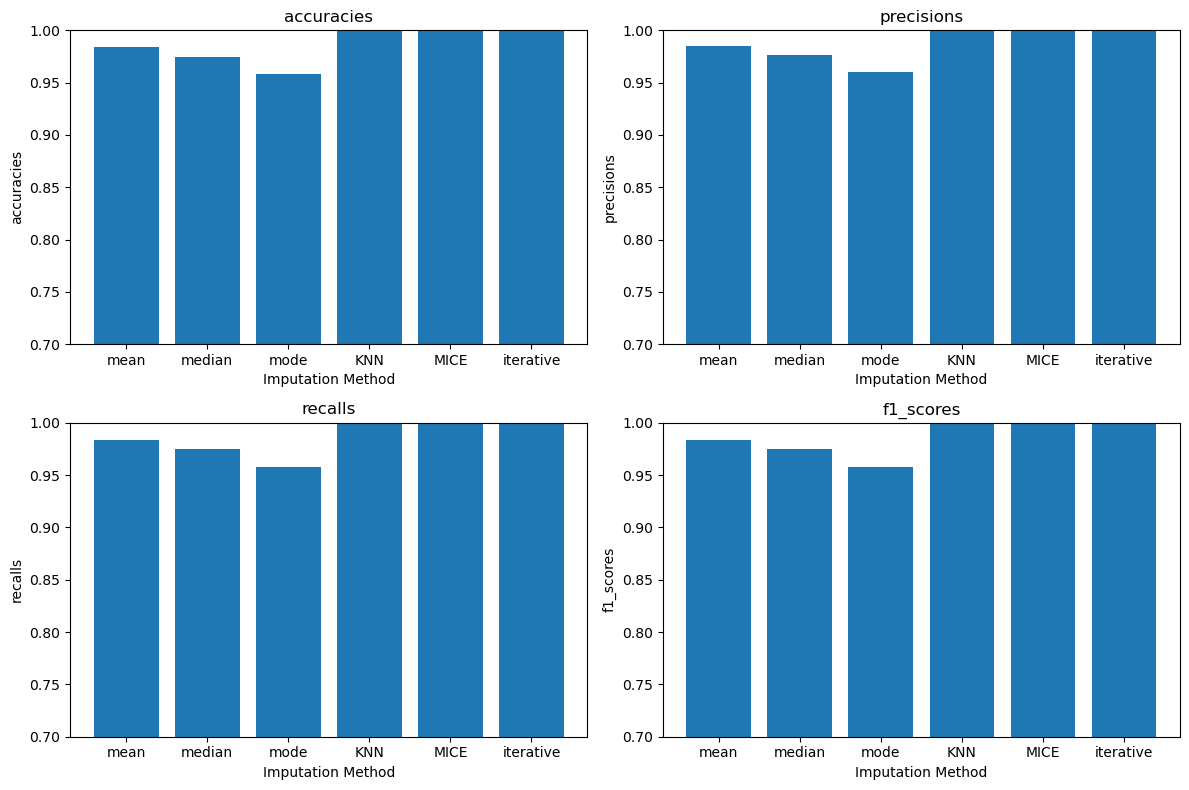

In [3]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


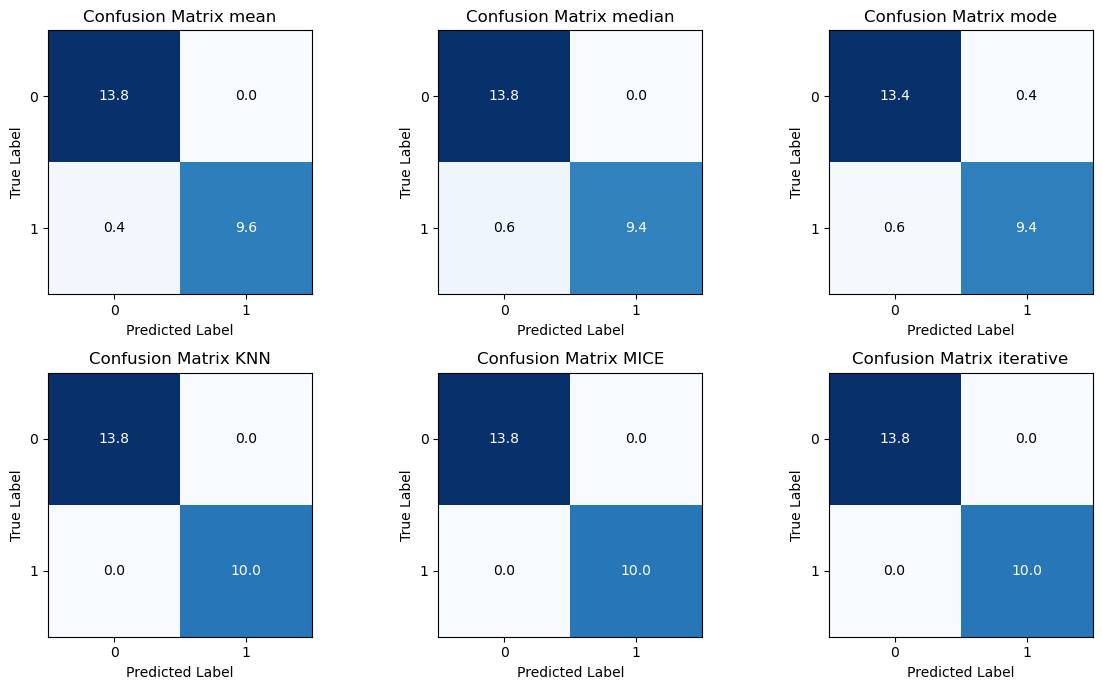

In [4]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

mean 1
               source                   target       p_value
6               class         specific_gravity  3.705588e-32
1             albumin                    class  2.106899e-26
8               class       packed_cell_volume  1.459562e-22
16  diabetes_mellitus             hypertension  2.481870e-22
9               class             hypertension  2.480524e-19
10              class        diabetes_mellitus  1.537545e-18
0             albumin                 pus_cell  2.114199e-17
3            pus_cell          pus_cell_clumps  4.151374e-17
17        pedal_edema                 appetite  1.579535e-11
15  diabetes_mellitus                    sugar  2.709541e-09
11              class                 appetite  6.043591e-09
12              class              pedal_edema  7.524790e-08
5               class           blood_pressure  7.630447e-08
2            pus_cell          red_blood_cells  1.689371e-07
4            pus_cell                 bacteria  3.088132e-07
13              c

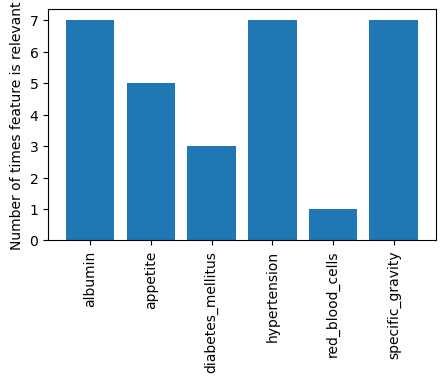

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

sources = []
for i, (name, models) in enumerate(results['models'].items()):
    for j, model in enumerate(models):
        print(name, j+1)
        mod = model.model
        independence_df = mod['independence_test']
        inf_on_class = independence_df[['source', 'target', 'p_value']].where(independence_df['target'] == 'class').dropna().sort_values(by='p_value')
        for index, row in inf_on_class.iterrows():
            sources.append(row['source'])
            
        all_inf = independence_df[['source', 'target', 'p_value']].dropna().sort_values(by='p_value')
        print(all_inf)
            
# plot soures and number of times they appear
plt.figure(figsize=(5, 3))
plt.bar(*np.unique(sources, return_counts=True))
plt.xticks(rotation=90)
plt.ylabel('Number of times feature is relevant')
plt.show()



mean 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


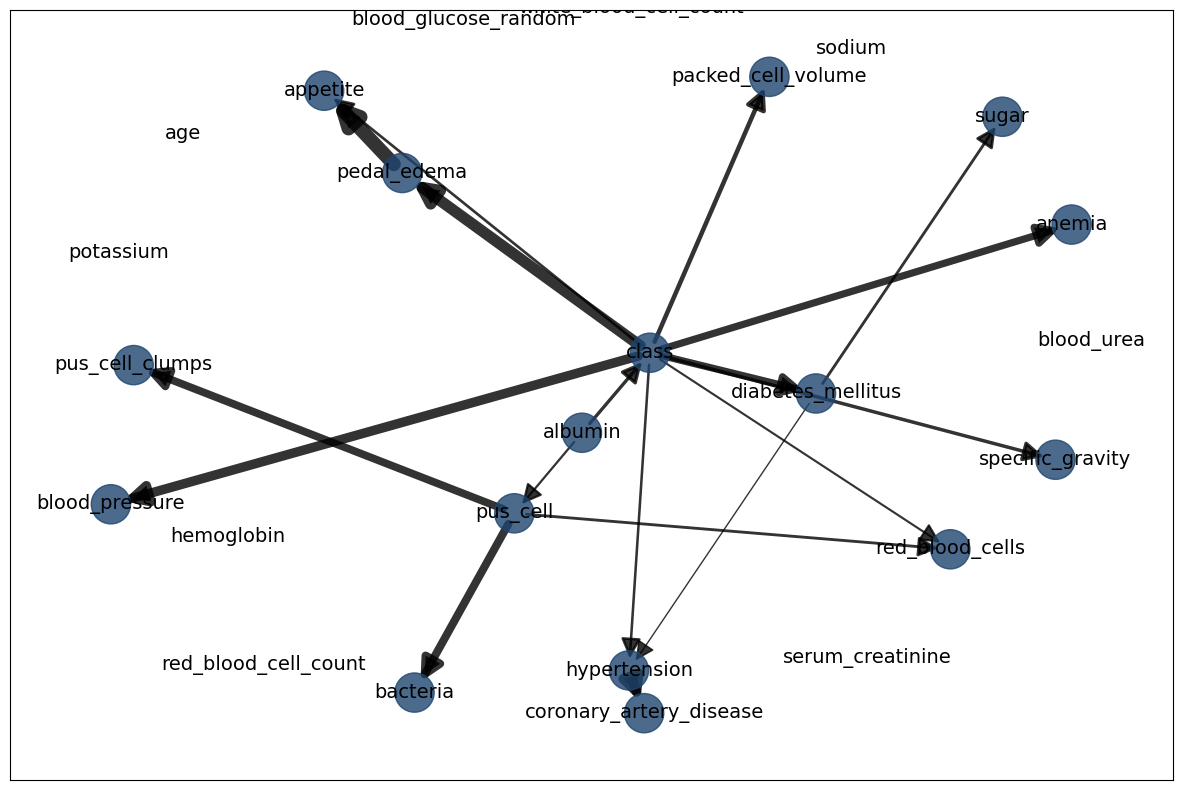

mean 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


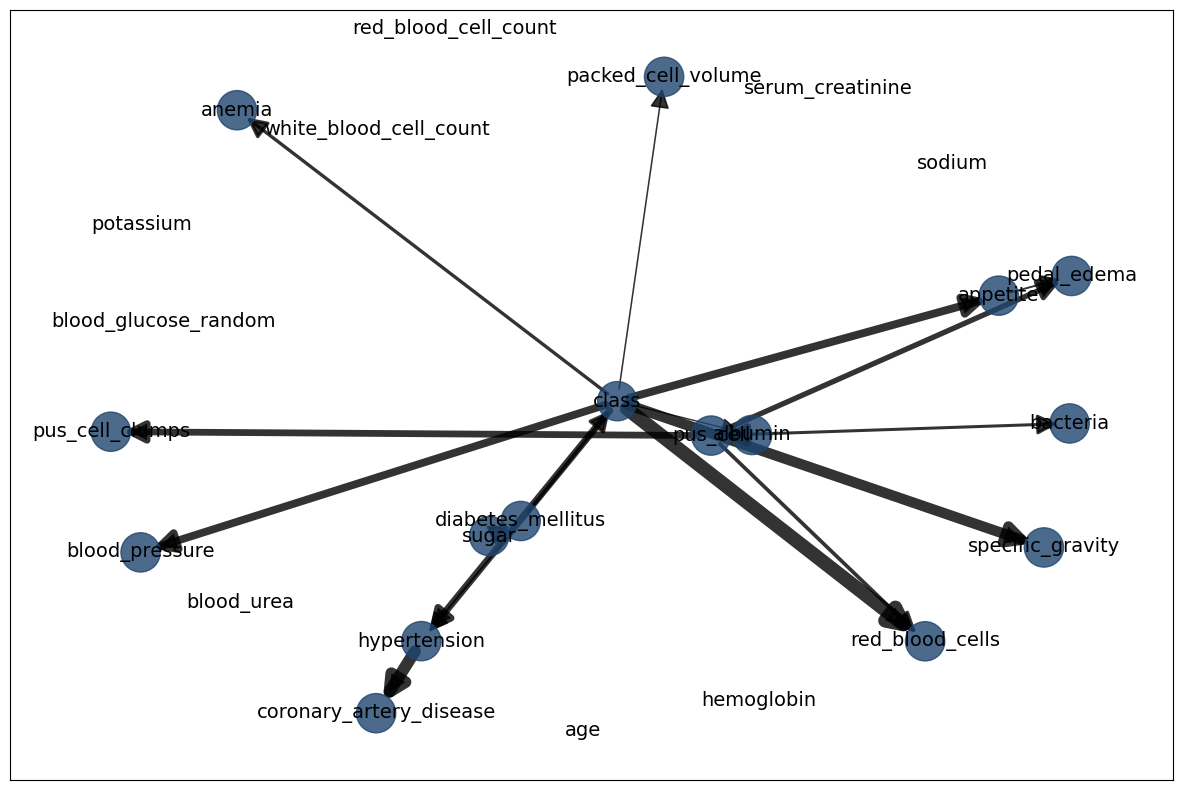

mean 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


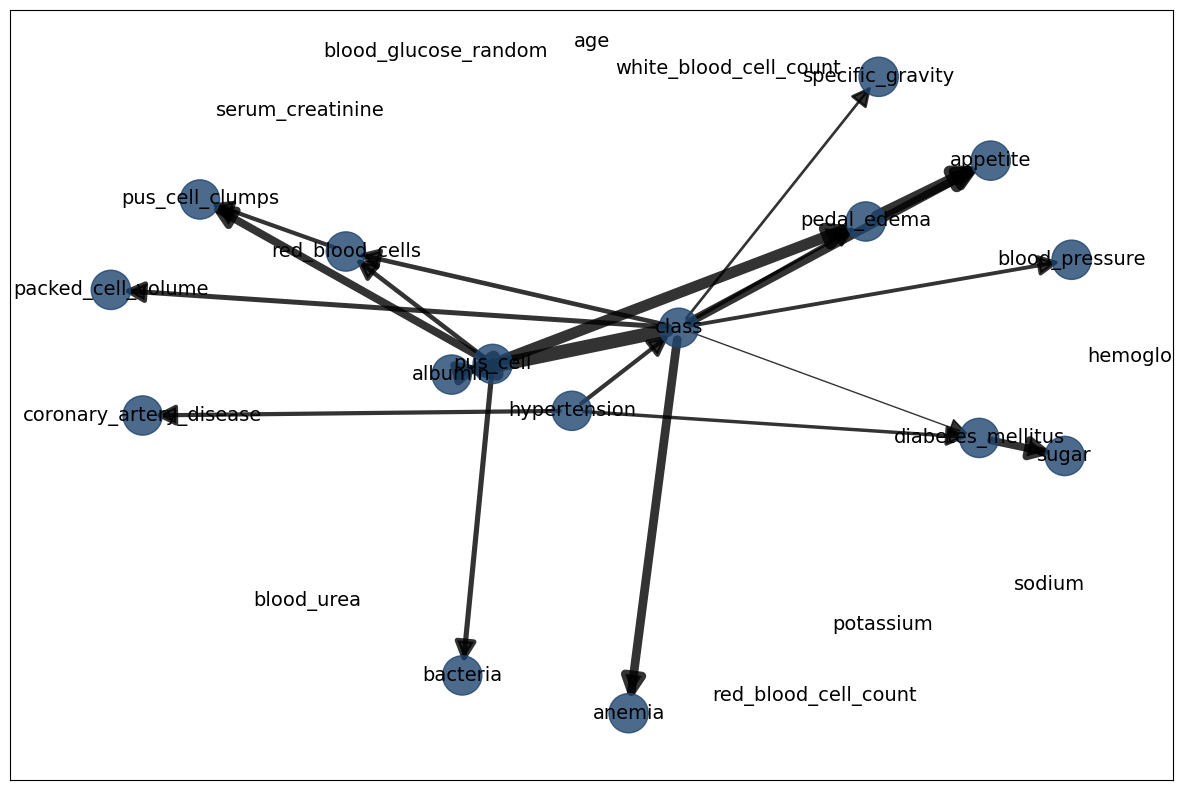

mean 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


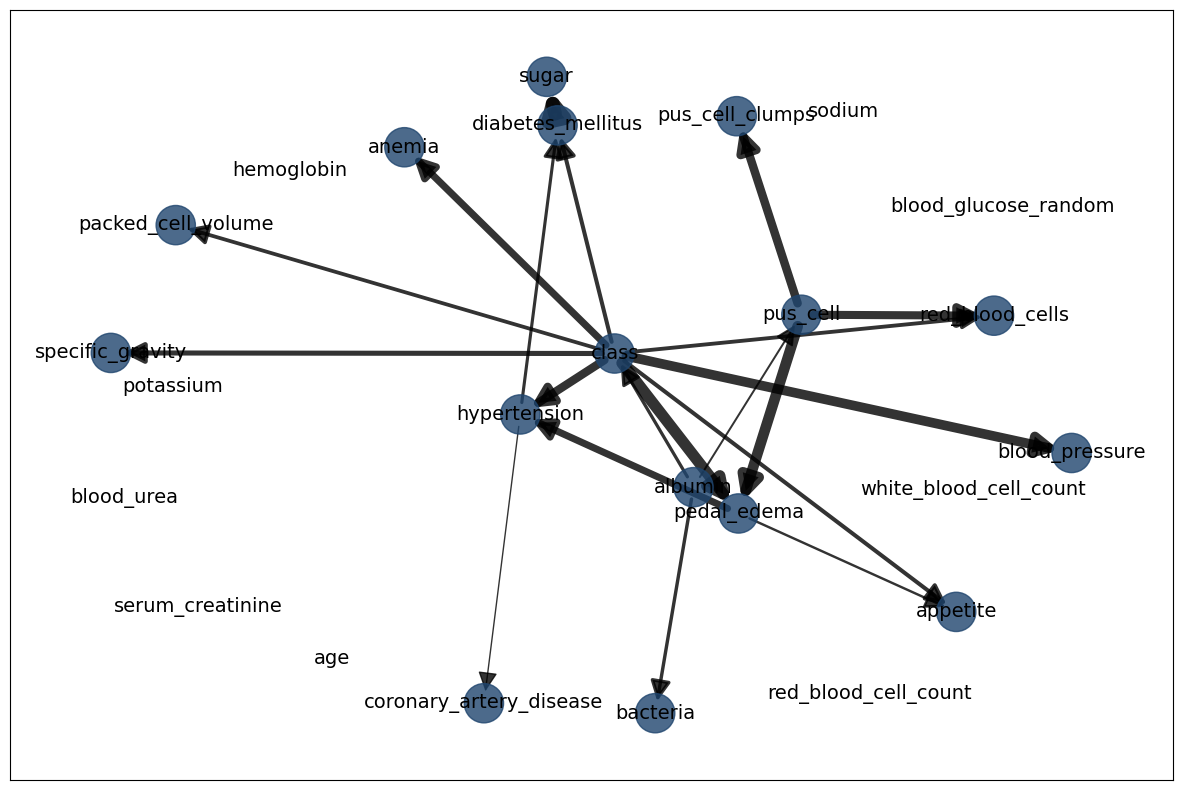

mean 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


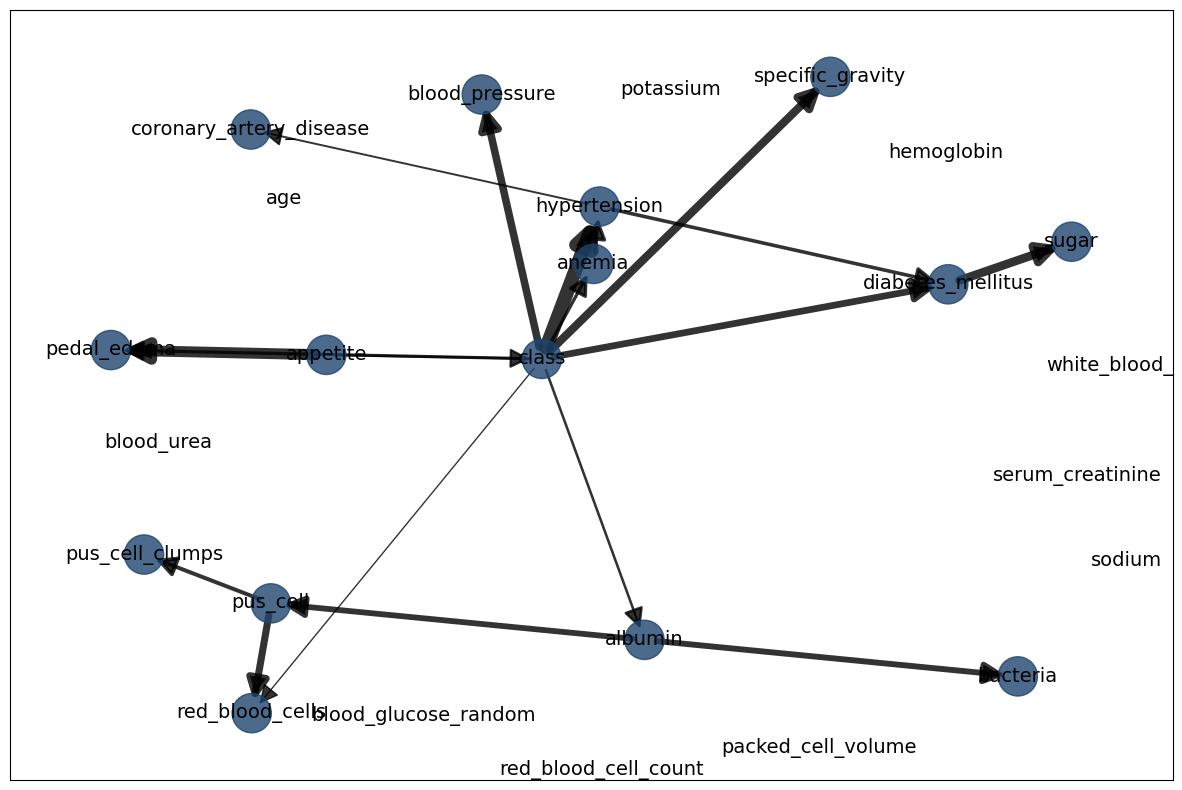

median 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


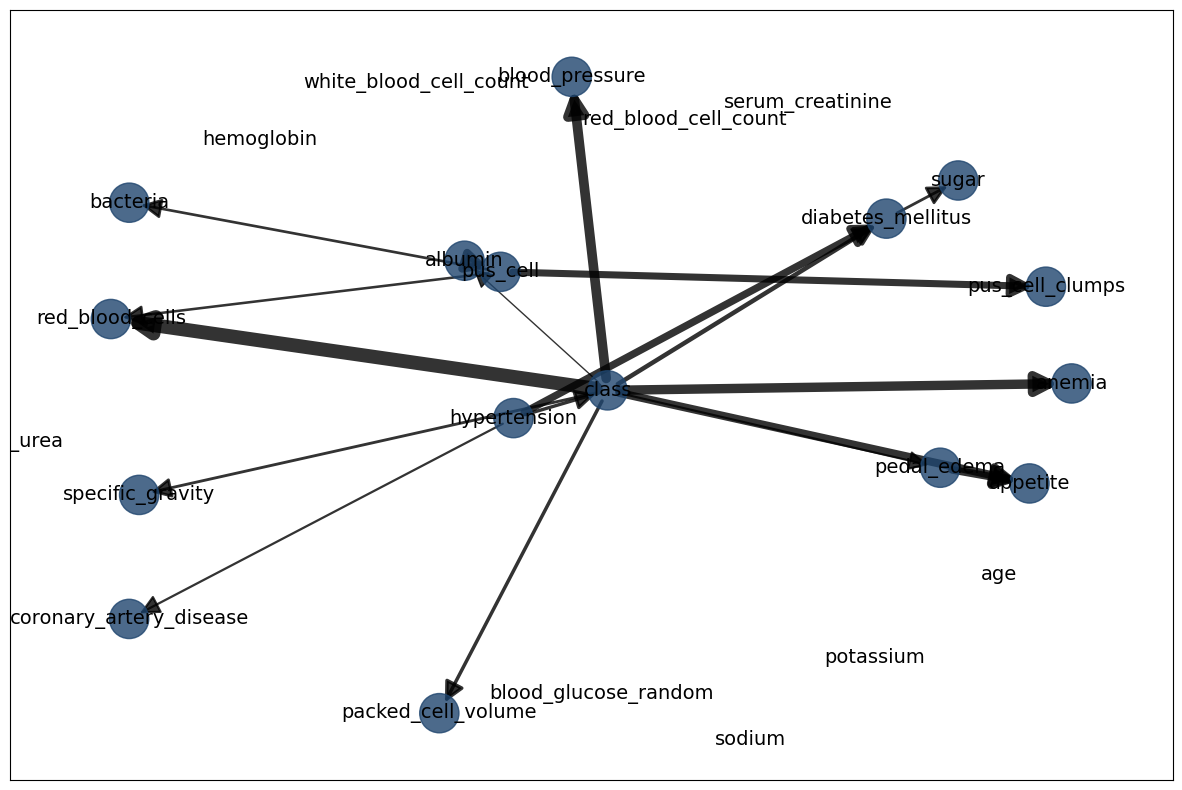

median 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


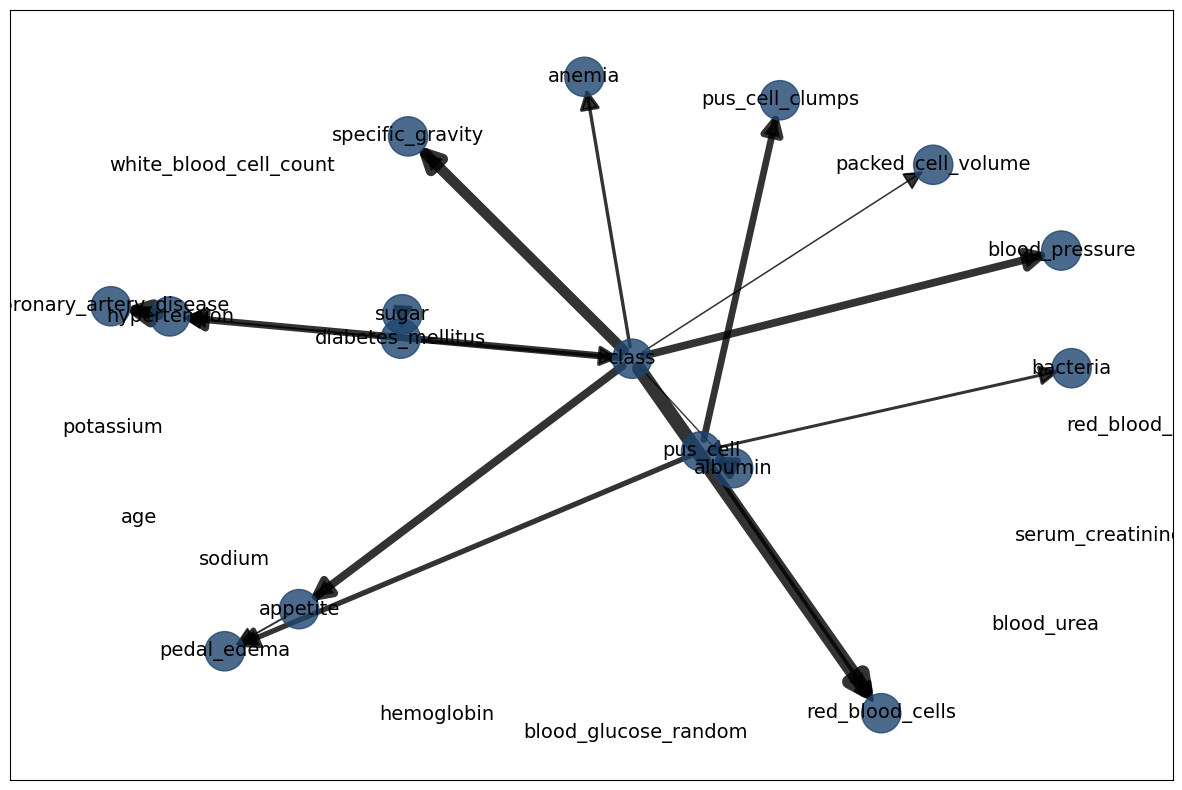

median 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


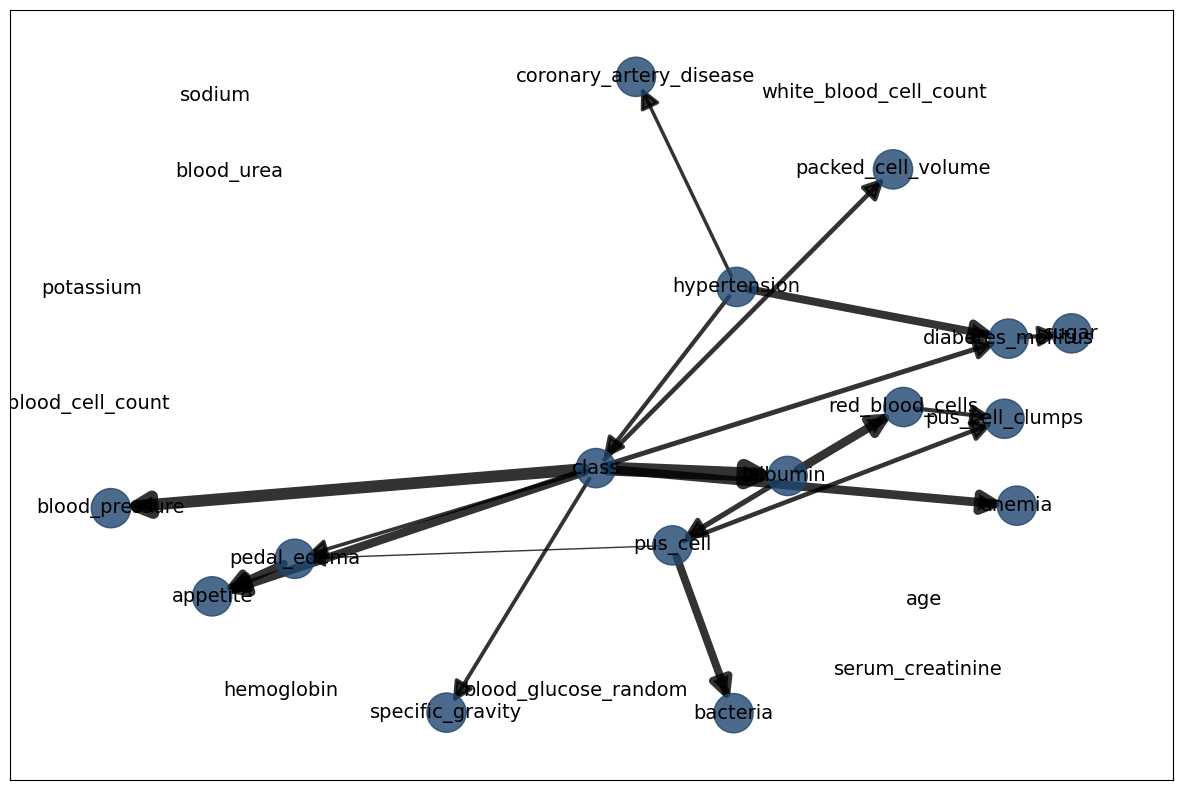

median 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


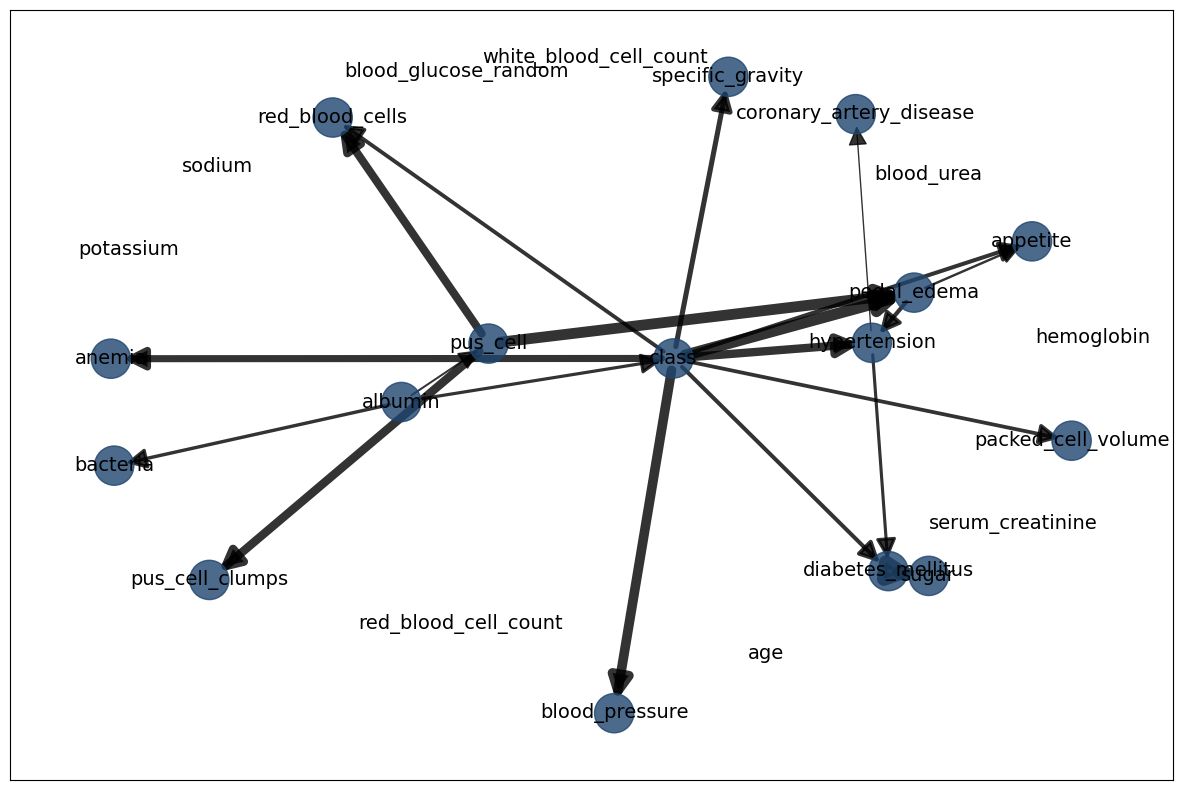

median 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


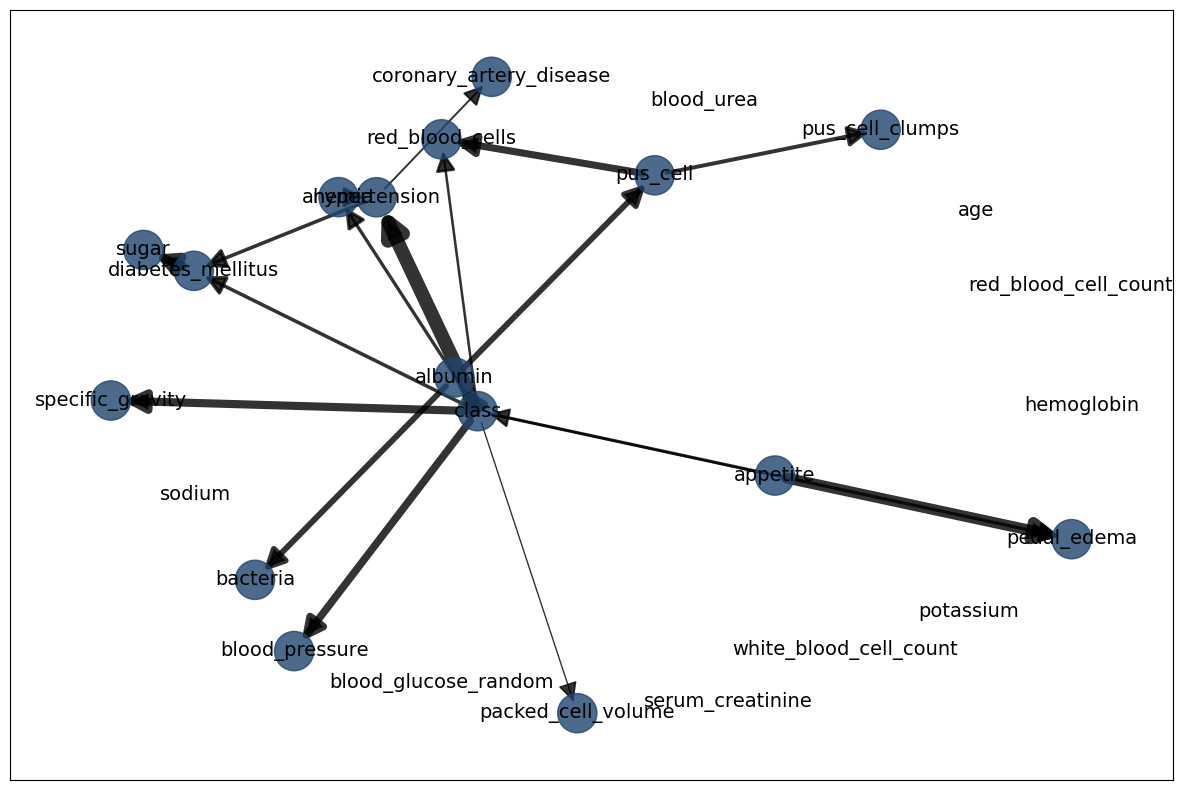

mode 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


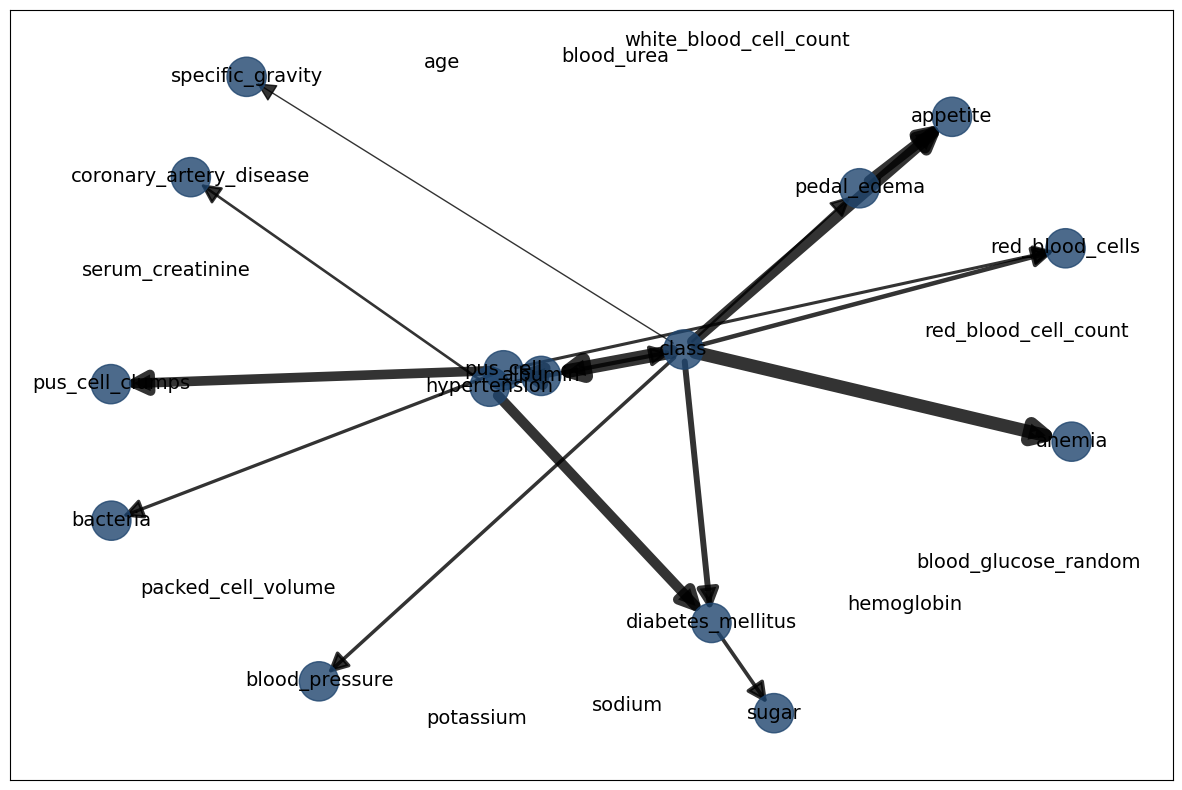

mode 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


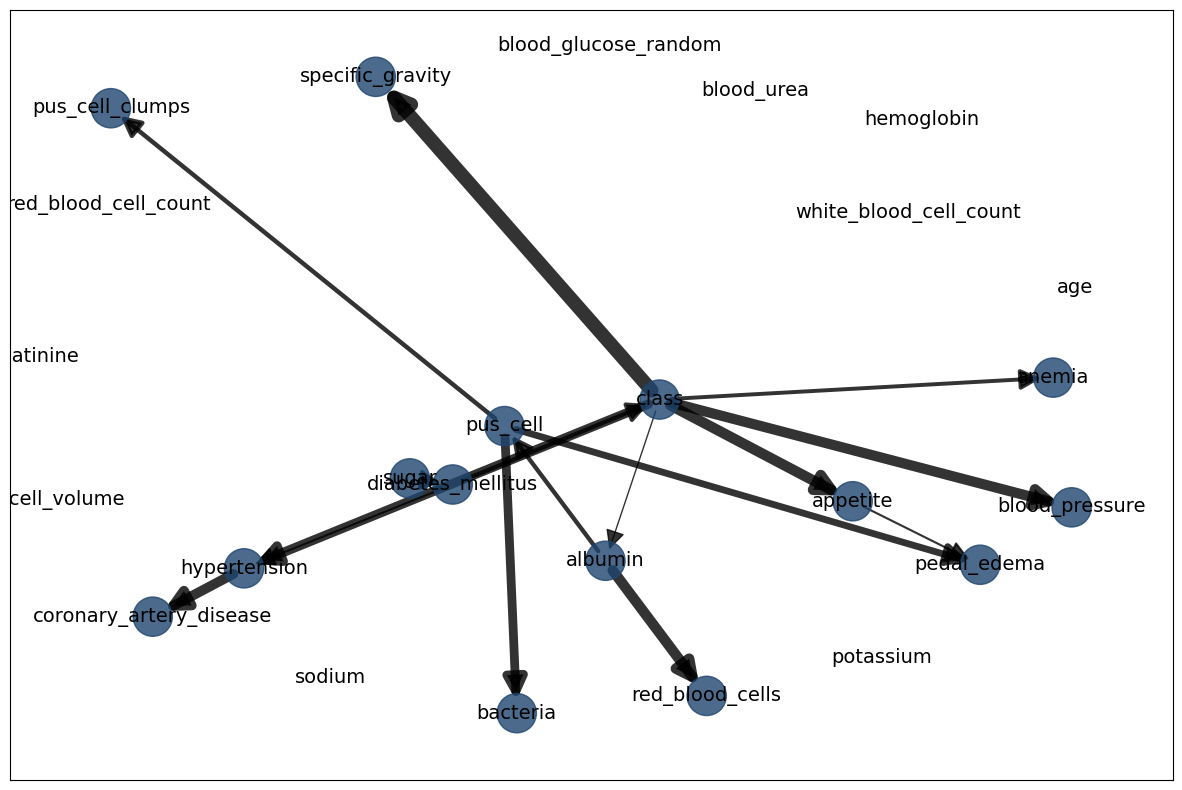

mode 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


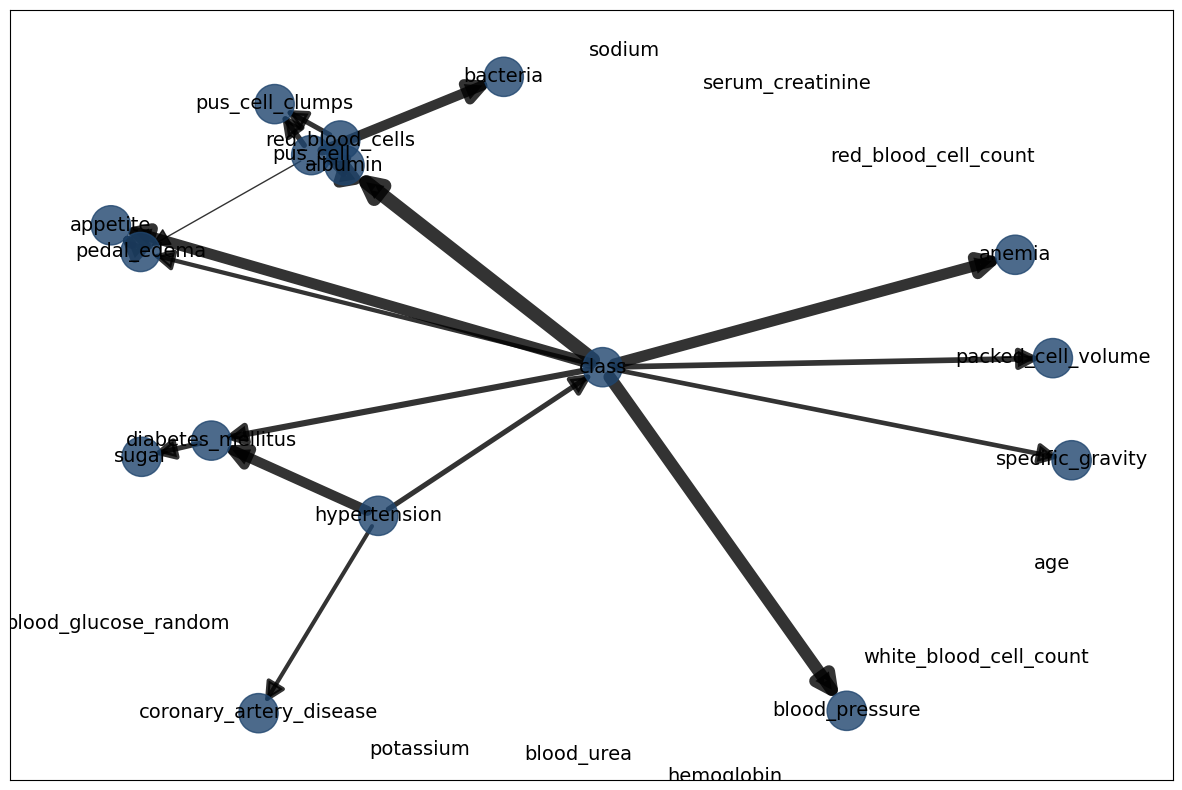

mode 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


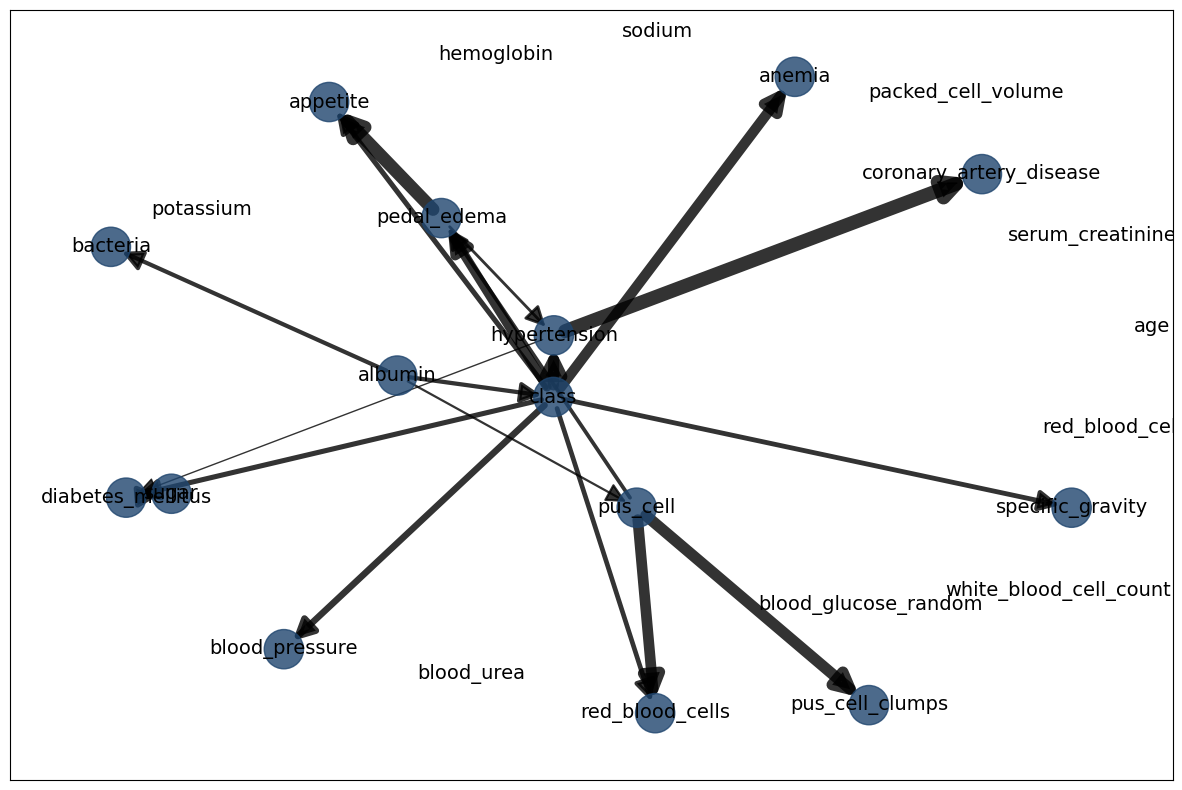

mode 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


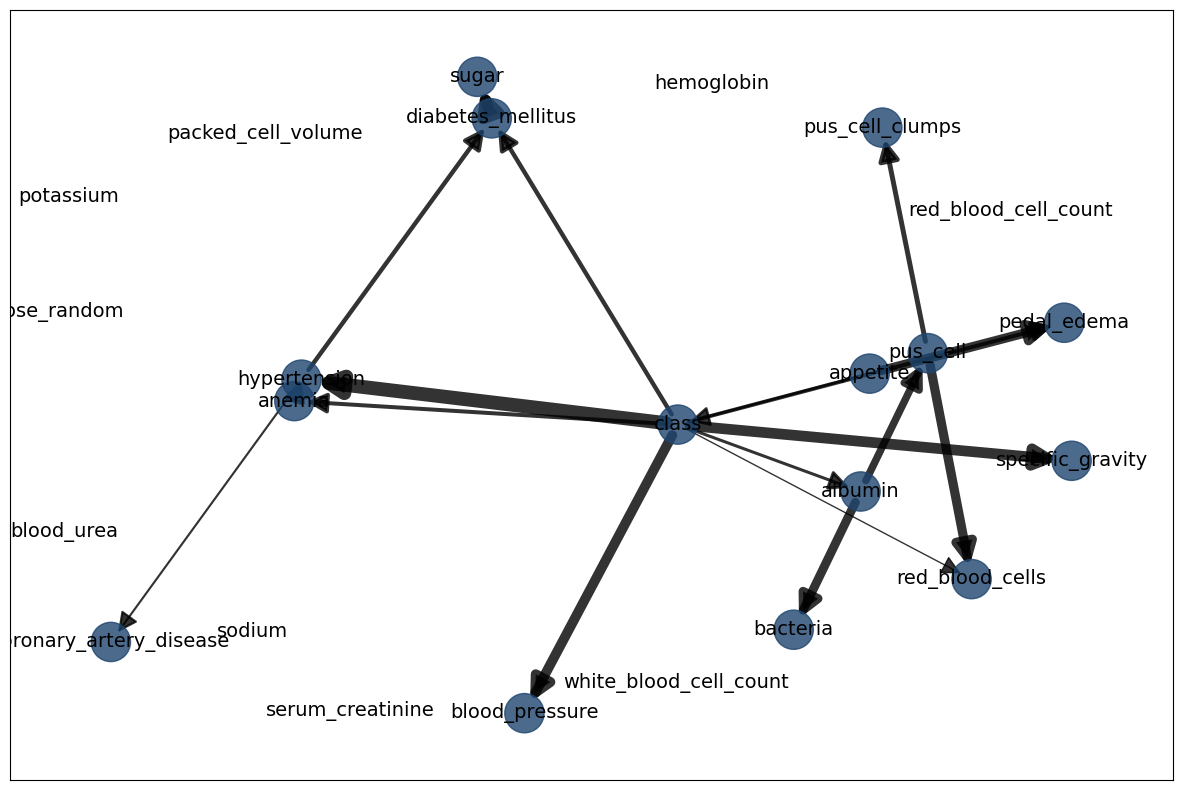

KNN 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


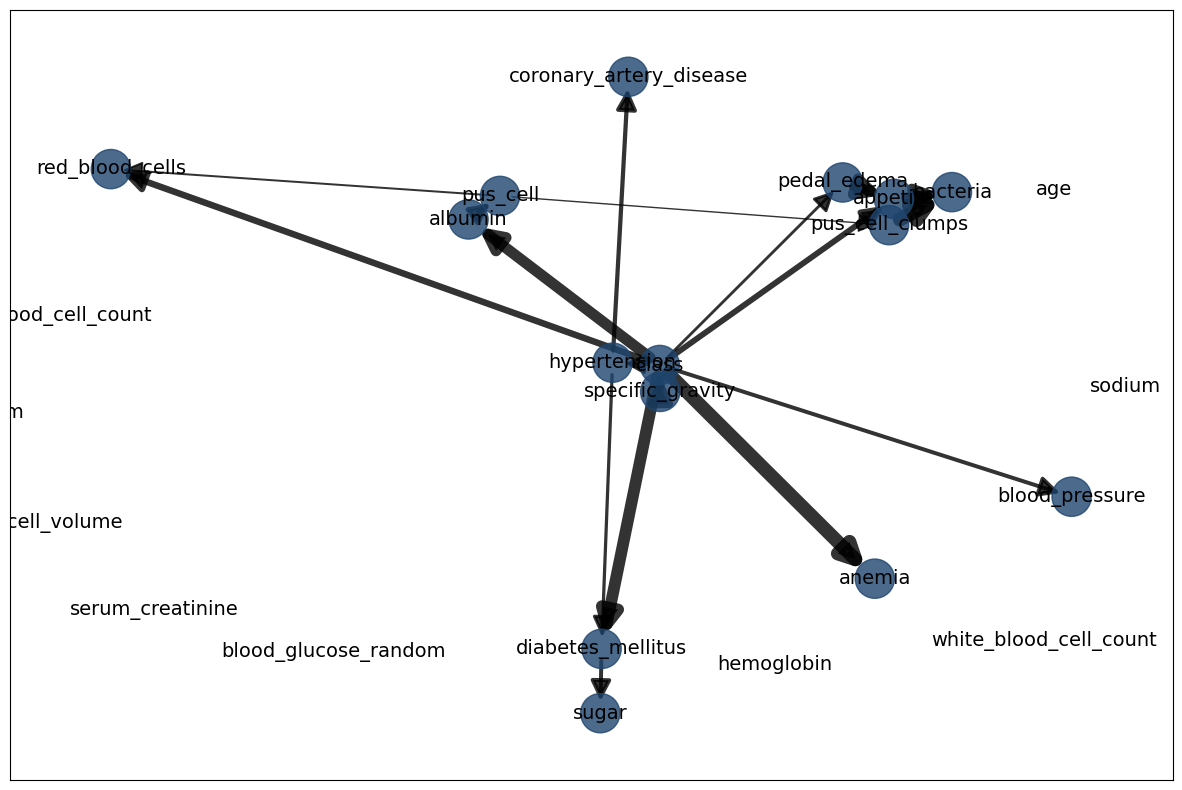

KNN 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


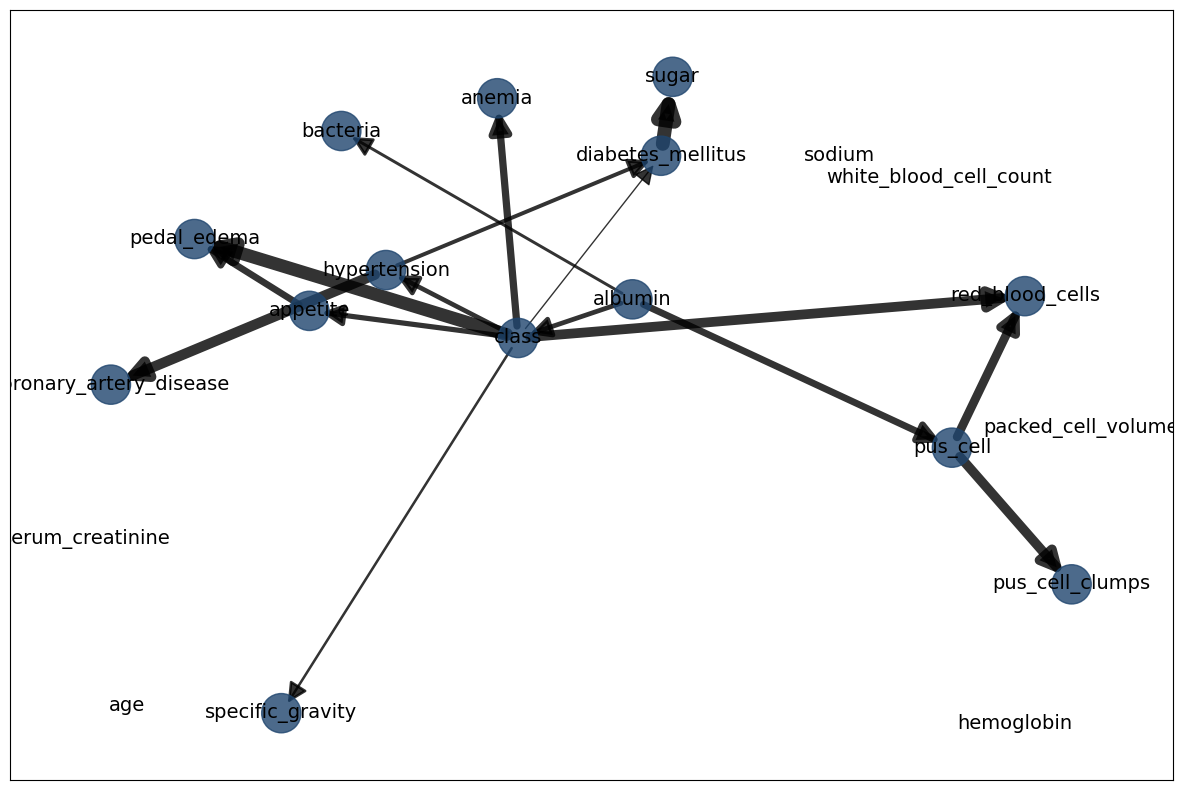

KNN 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


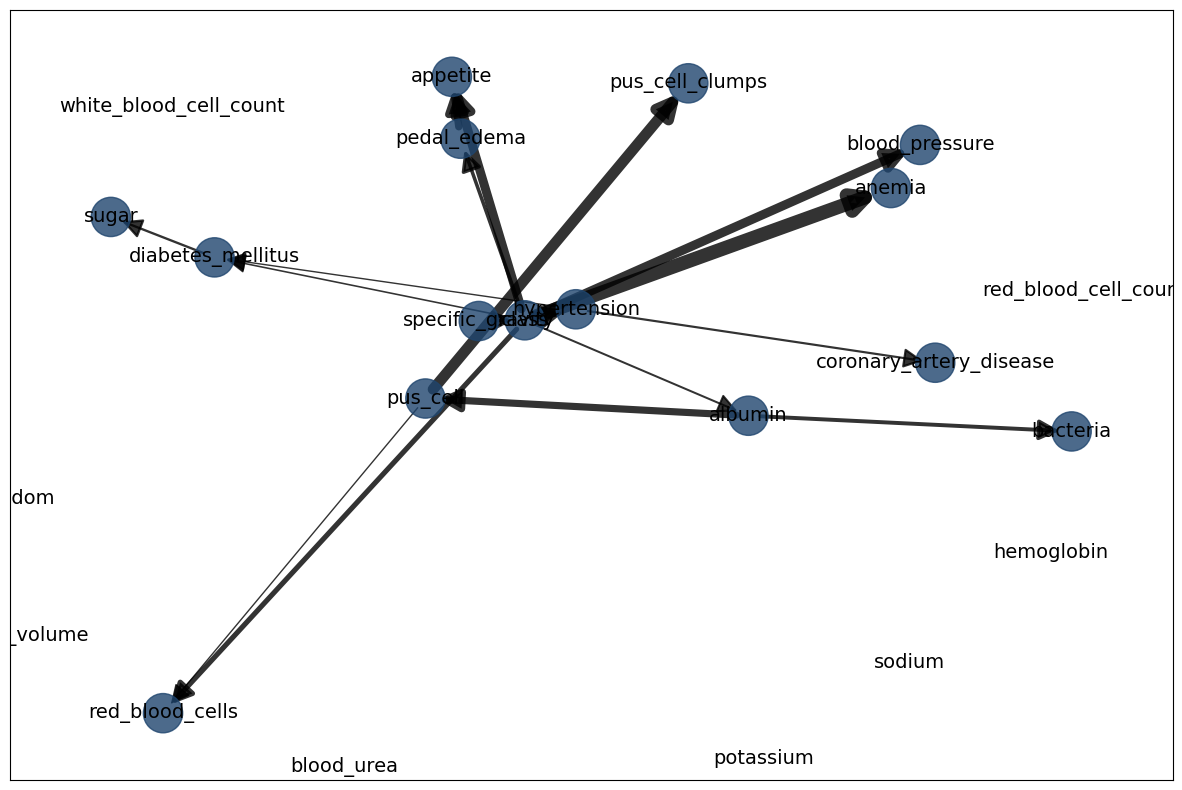

KNN 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


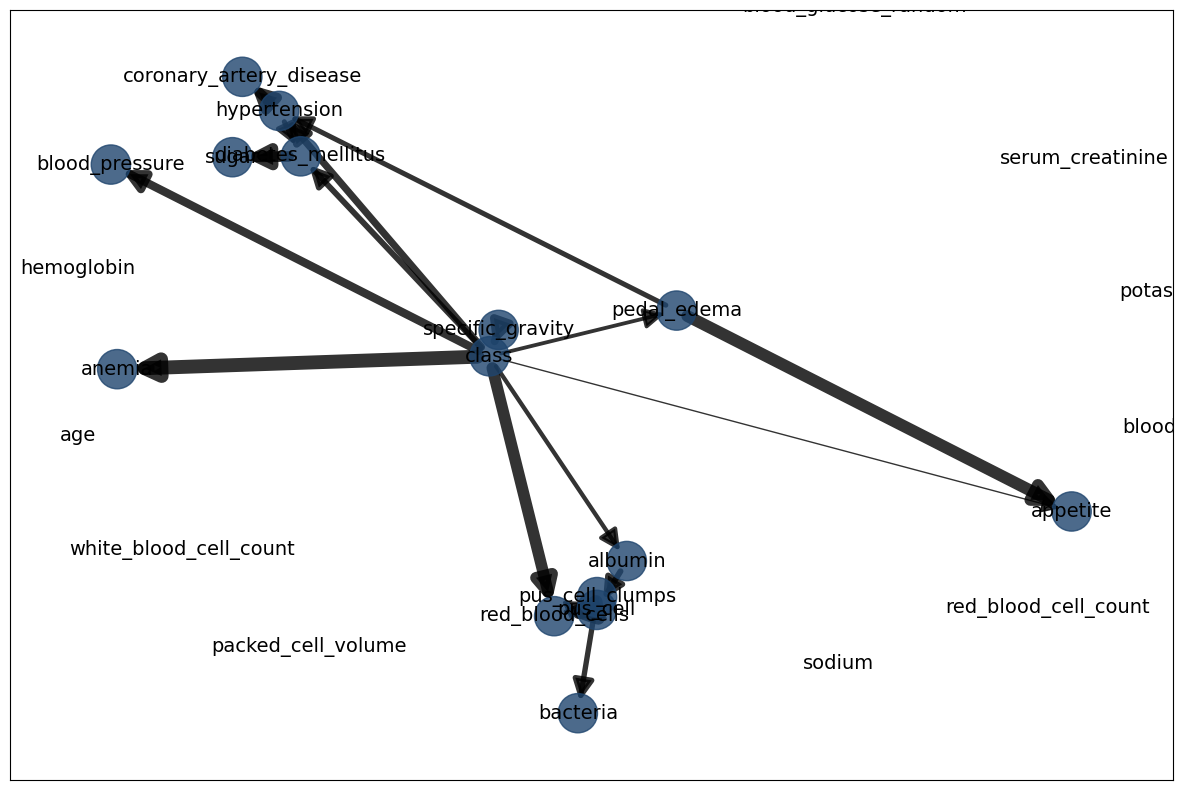

KNN 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


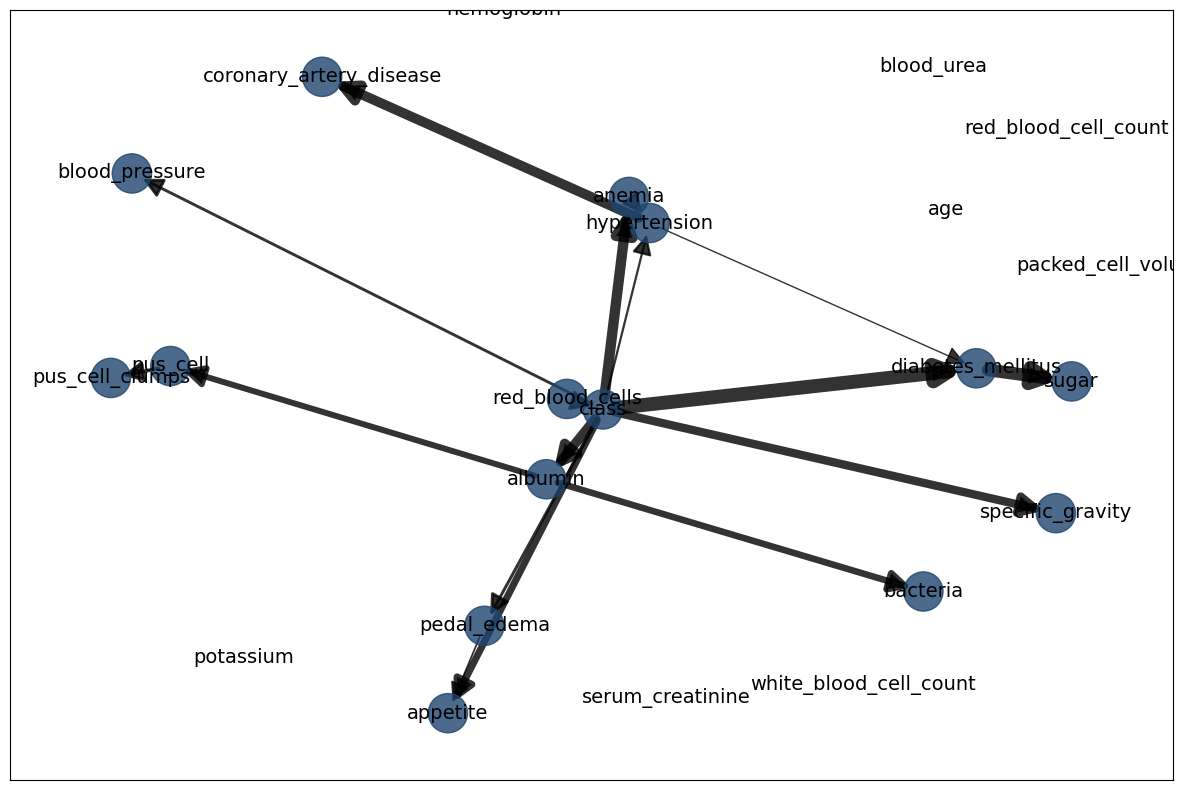

MICE 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


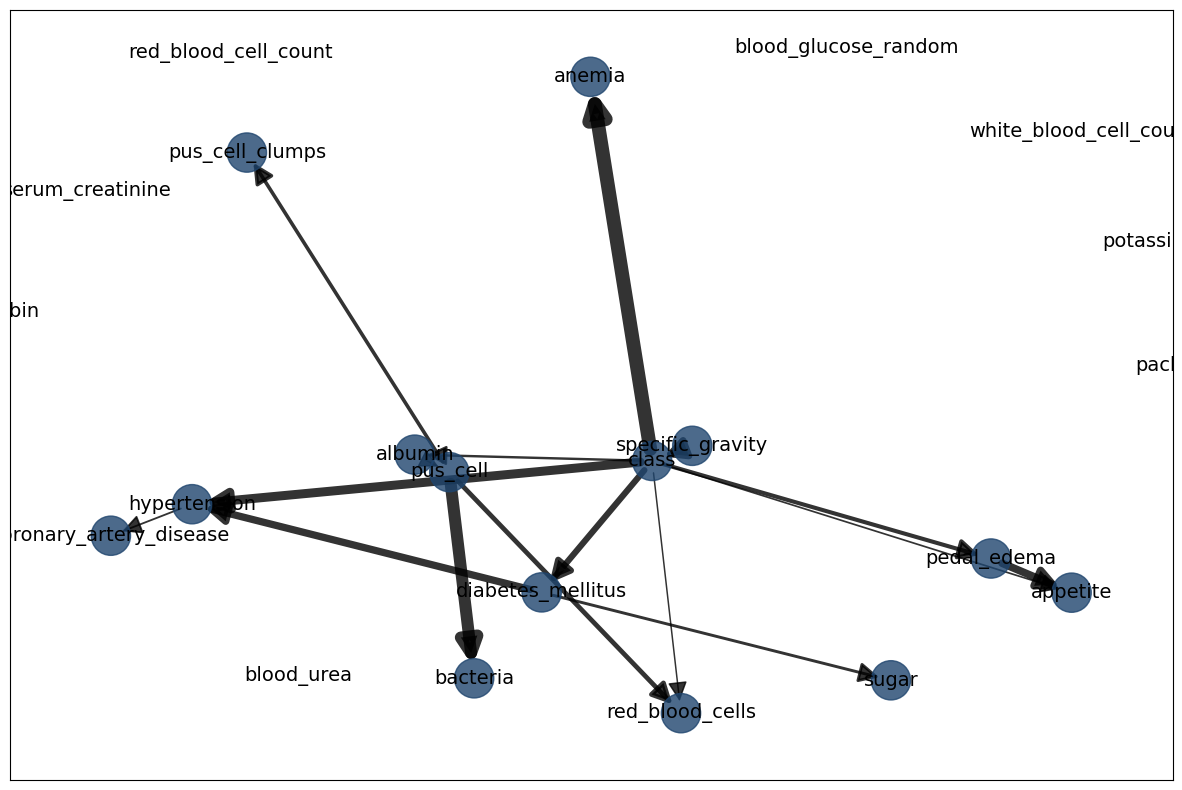

MICE 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


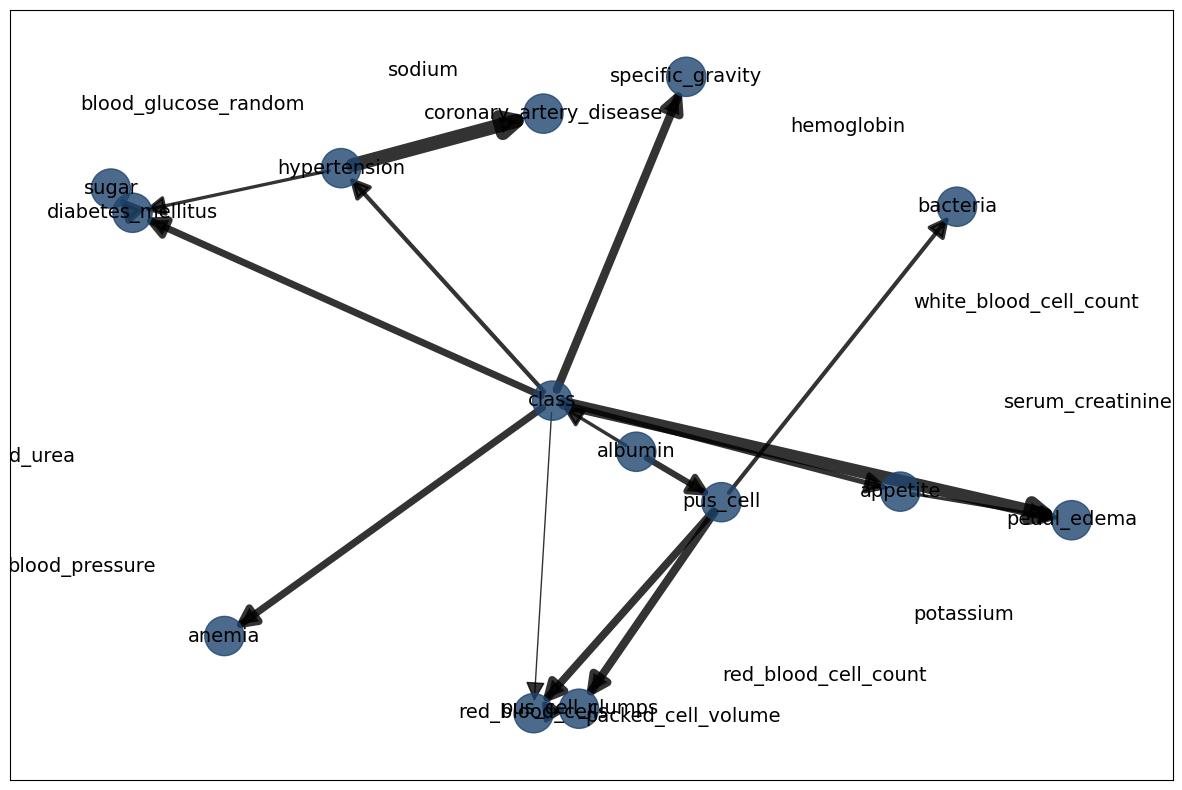

MICE 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


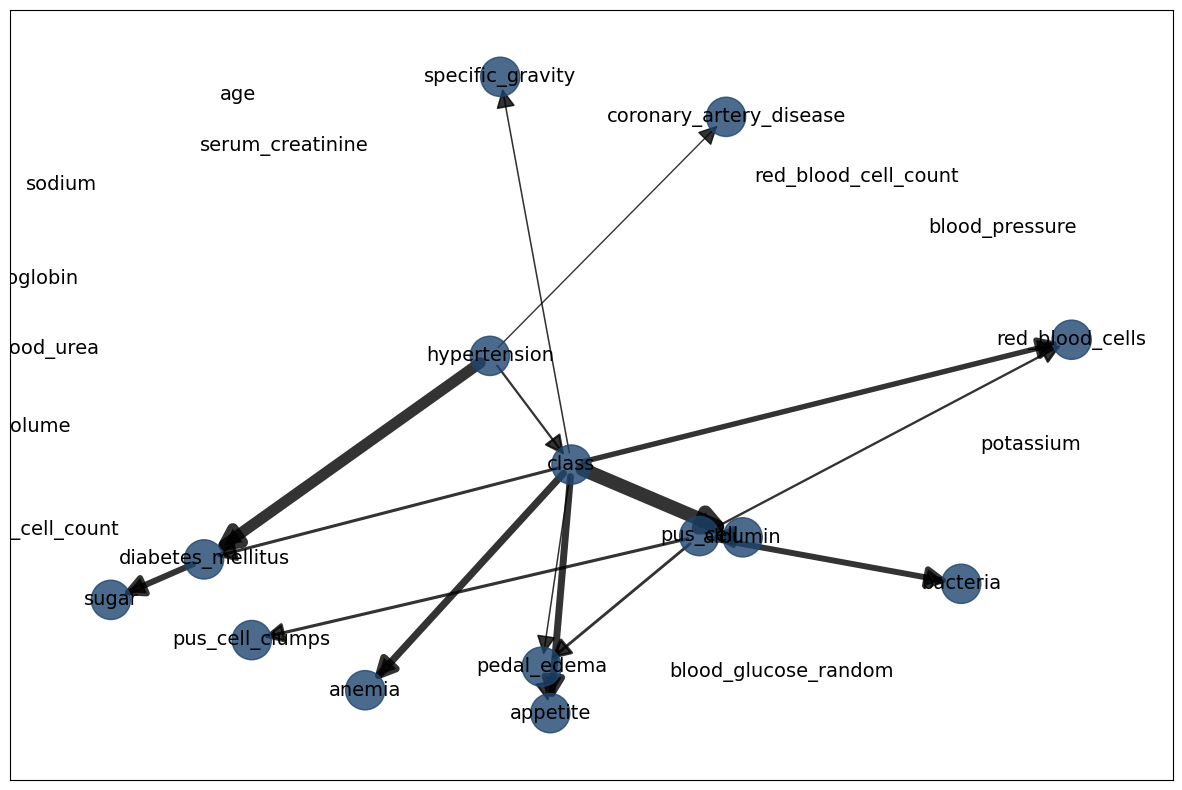

MICE 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


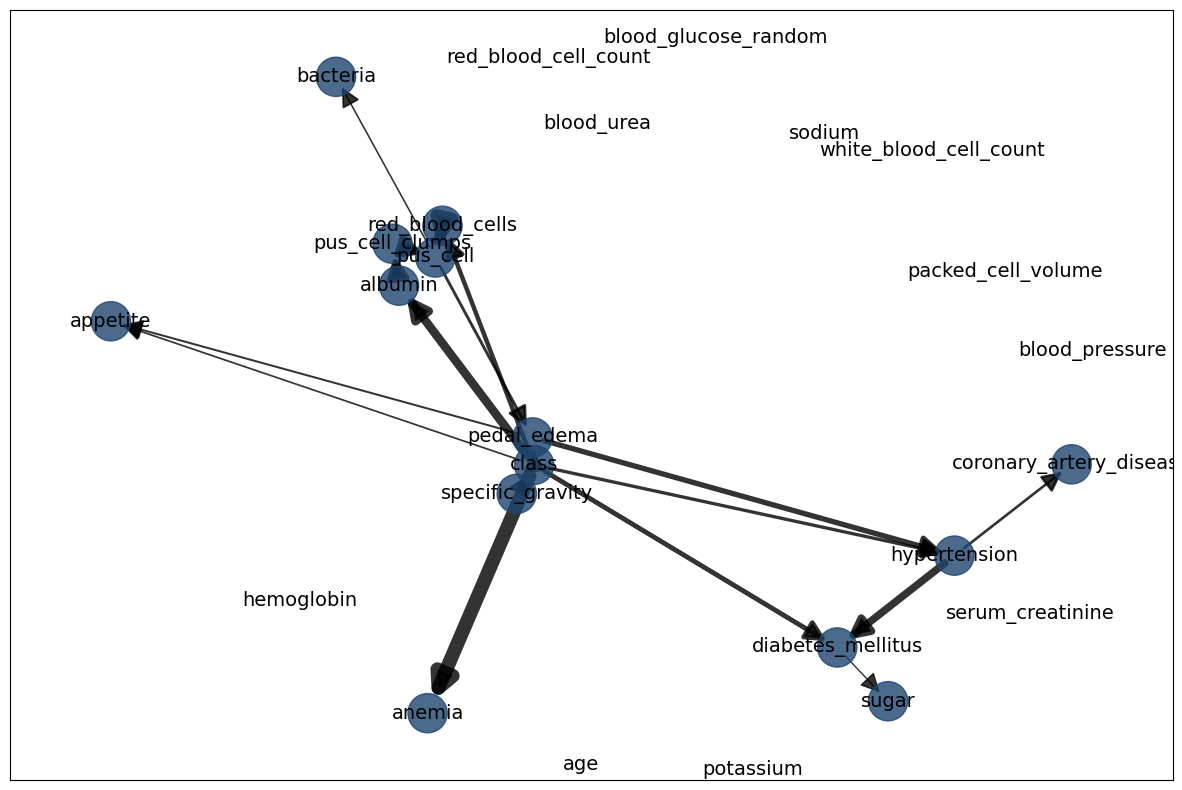

MICE 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


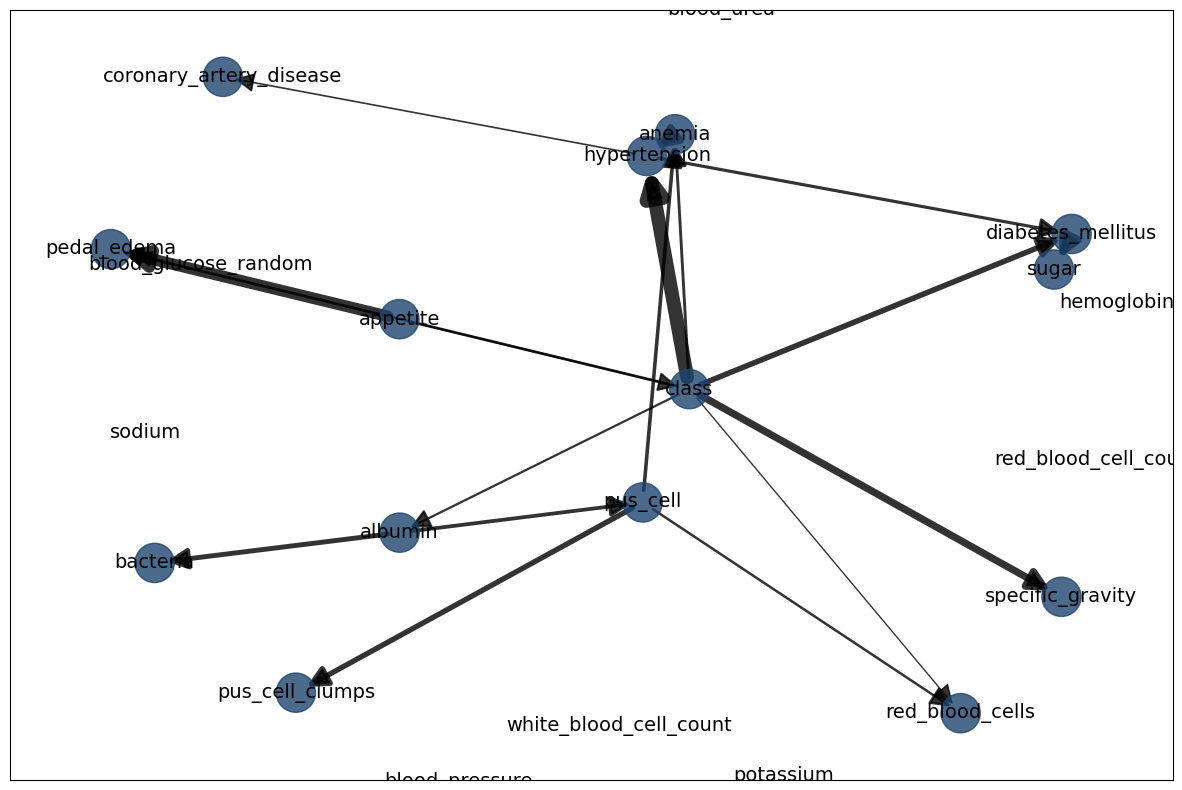

iterative 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


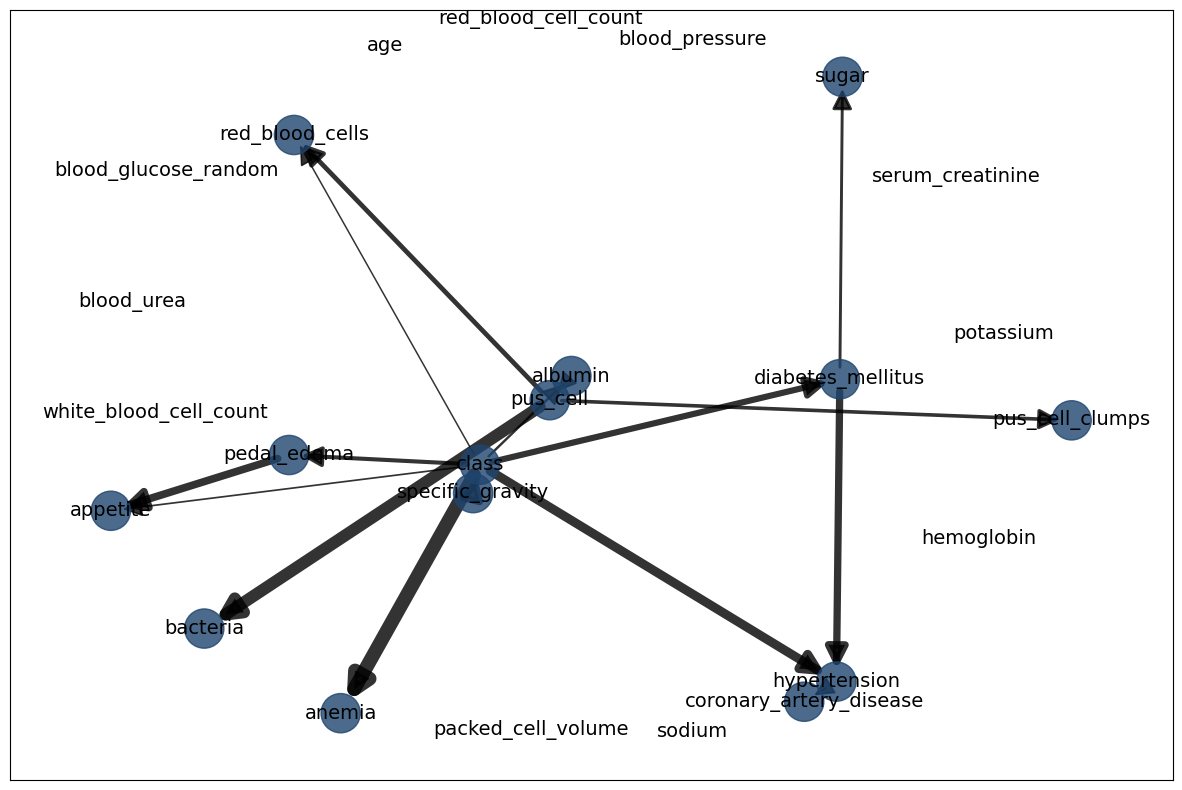

iterative 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


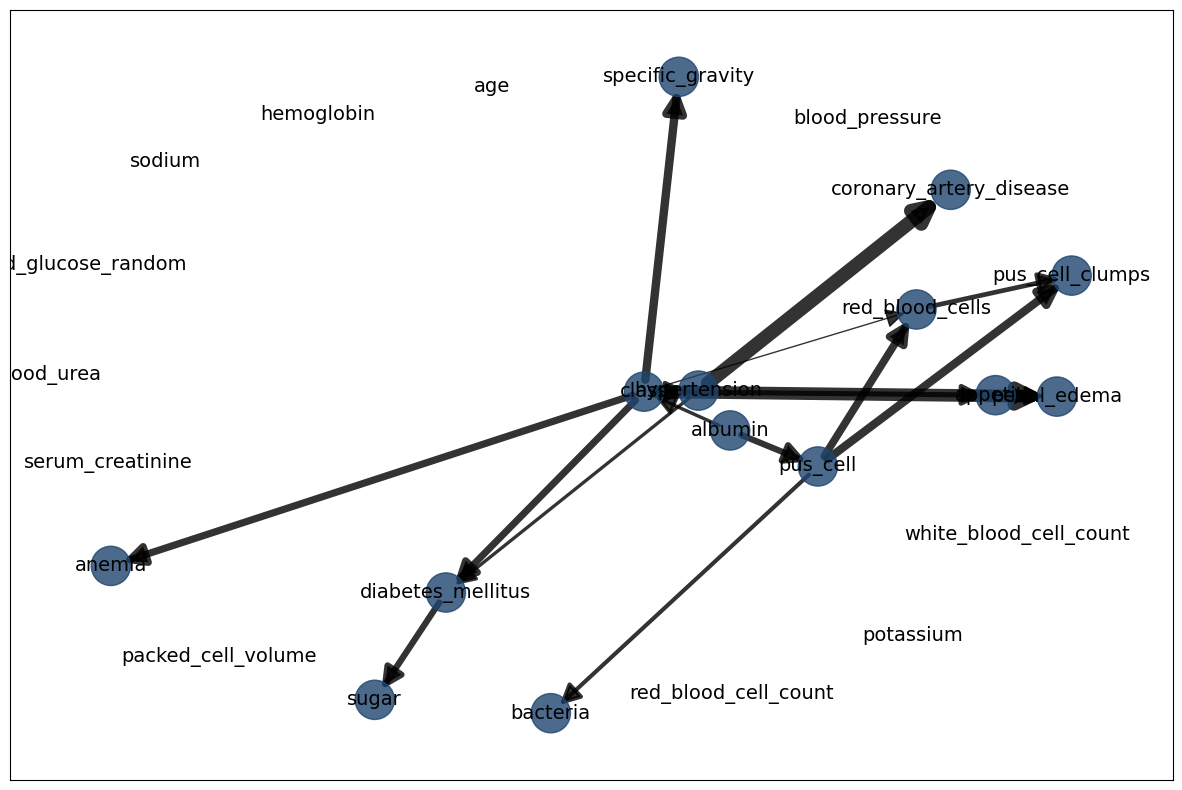

iterative 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


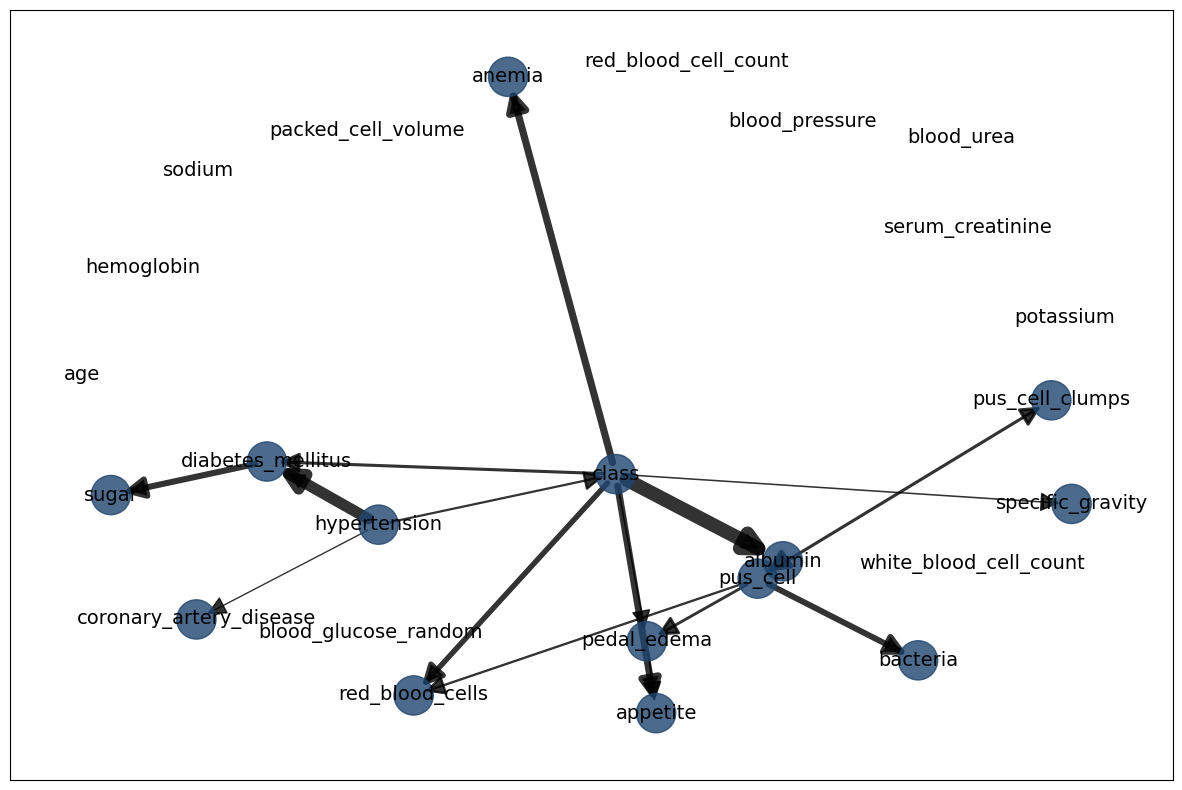

iterative 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


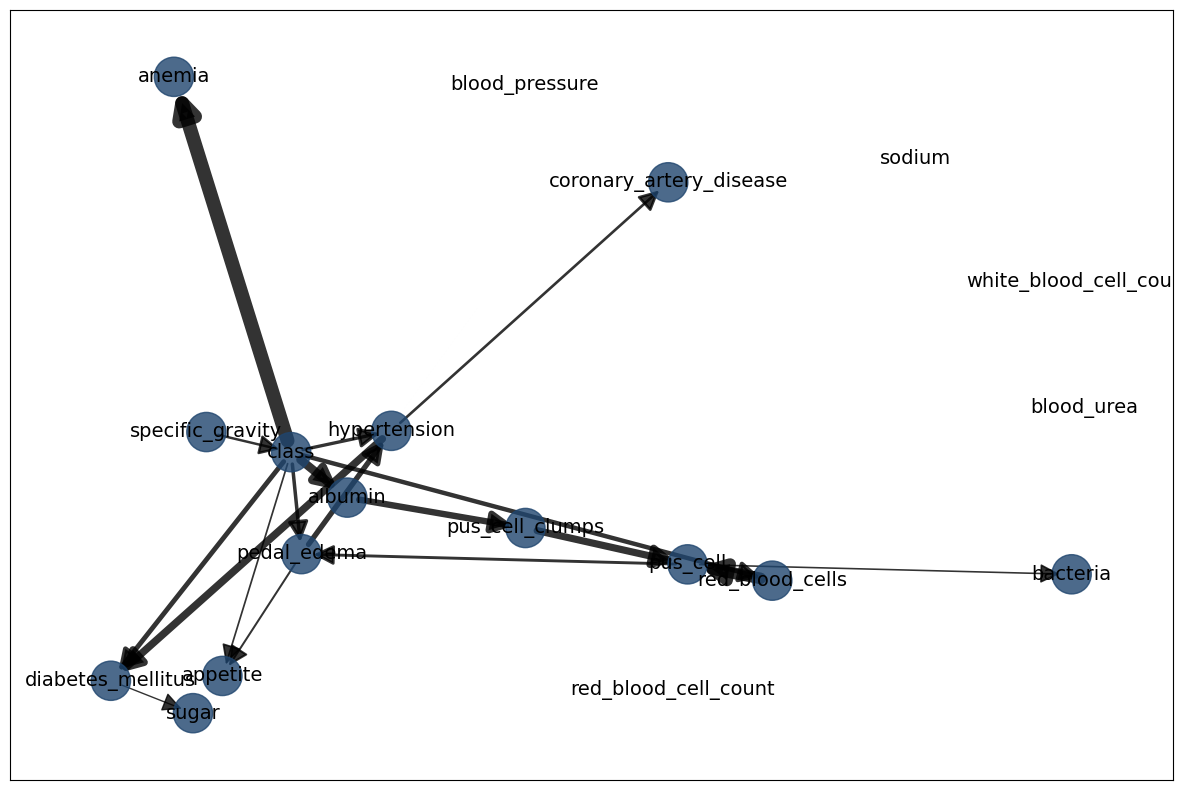

iterative 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


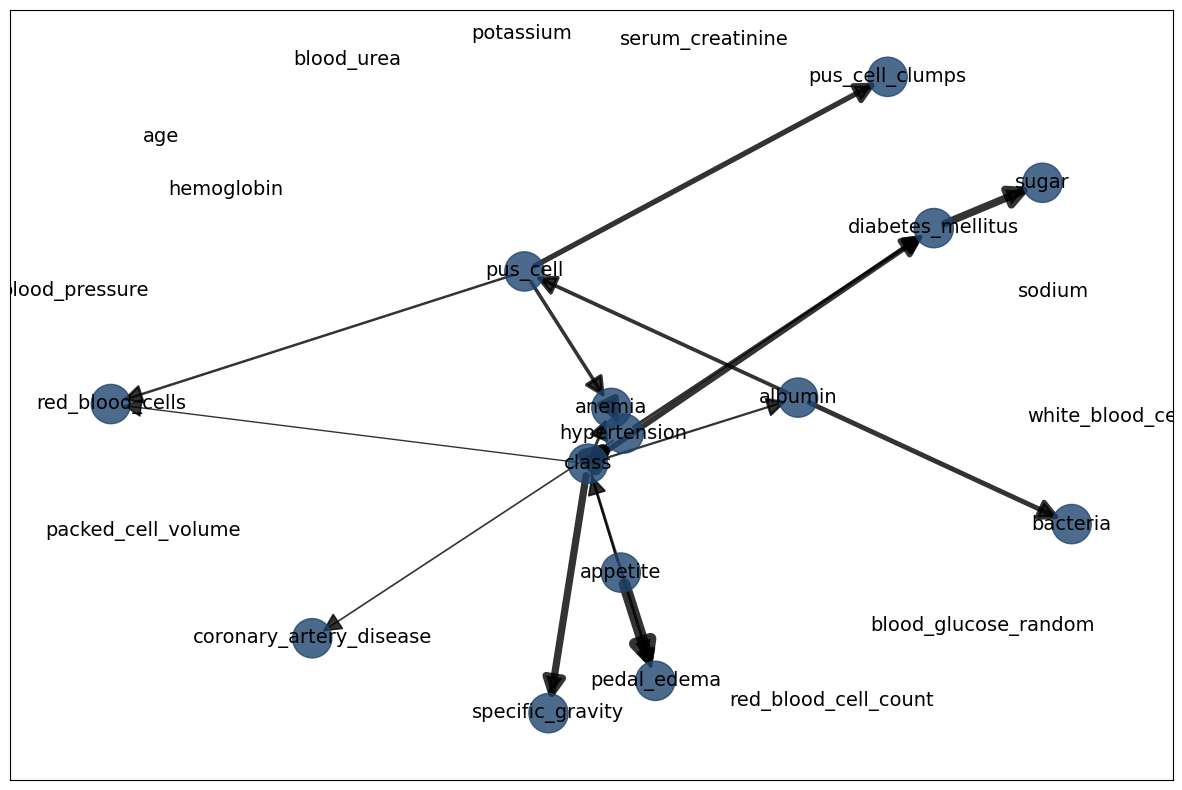

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

for i, (name, models) in enumerate(results['models'].items()):
    for j, model in enumerate(models):
        print(name, j)
        mod = model.model
        G = bn.plot(model.model)